In [1]:
import pandas as pd

In [2]:
meteo=pd.read_csv("meteo.csv",dayfirst=False,index_col=0,parse_dates=['date'])


In [3]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15706 entries, 1966-01-01 to 2008-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    15706 non-null  float64
 1   prec    15706 non-null  float64
 2   hum     15644 non-null  float64
dtypes: float64(3)
memory usage: 490.8 KB


In [4]:
meteo


,temp,prec,hum
date,,,
1966-01-01,-8.6,4.0,74.0
1966-01-02,-4.7,7.3,88.0
1966-01-03,-3.4,2.3,91.0
1966-01-04,-8.9,0.5,76.0
1966-01-05,-13.4,0.0,77.0
...,...,...,...
2008-12-27,2.0,0.0,92.0
2008-12-28,-3.2,0.0,96.0
2008-12-29,0.8,0.0,91.0


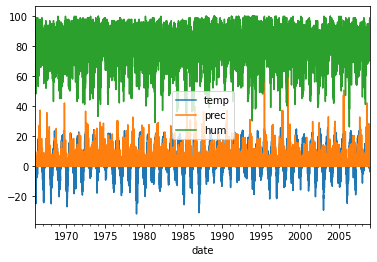

In [5]:
meteo.plot()

In [66]:
meteo[">5"]=meteo["temp"].gt(5)
meteo["<5"]=~meteo[">5"]

In [67]:
meteo

,temp,prec,hum,>5,<5
date,,,,,
1966-01-01,-8.6,4.0,74.0,False,True
1966-01-02,-4.7,7.3,88.0,False,True
1966-01-03,-3.4,2.3,91.0,False,True
1966-01-04,-8.9,0.5,76.0,False,True
1966-01-05,-13.4,0.0,77.0,False,True
...,...,...,...,...,...
2008-12-27,2.0,0.0,92.0,False,True
2008-12-28,-3.2,0.0,96.0,False,True
2008-12-29,0.8,0.0,91.0,False,True


In [71]:
a_v = meteo[[">5"]] != 0
a_z = meteo[["<5"]] != 0

df_v = a_v[">5"].cumsum()-a_v[">5"].cumsum().where(~a_v[">5"]).ffill().fillna(0)
df_z= a_z["<5"].cumsum()-a_z["<5"].cumsum().where(~a_z["<5"]).ffill().fillna(0)

df_z=df_z.to_frame()
df_v=df_v.to_frame()

df_z

,<5
date,
1966-01-01,1.0
1966-01-02,2.0
1966-01-03,3.0
1966-01-04,4.0
1966-01-05,5.0
...,...
2008-12-27,25.0
2008-12-28,26.0
2008-12-29,27.0


In [72]:
meteo["SummerCumsum"]=df_v
meteo["WinterCumSum"]=df_z

meteo.loc["1984"]

In [88]:
meteo['veg_period']=False


In [89]:
if(meteo['>5'].iloc[0]==False):
    meteo['veg_period'].iloc[0]=False
else:
    meteo['veg_period'].iloc[0]=True


,temp,prec,hum,>5,<5,SummerCumsum,WinterCumSum,veg_period
date,,,,,,,,
1966-01-01,-8.6,4.0,74.0,False,True,0.0,1.0,False
1966-01-02,-4.7,7.3,88.0,False,True,0.0,2.0,False
1966-01-03,-3.4,2.3,91.0,False,True,0.0,3.0,False
1966-01-04,-8.9,0.5,76.0,False,True,0.0,4.0,False
1966-01-05,-13.4,0.0,77.0,False,True,0.0,5.0,False
...,...,...,...,...,...,...,...,...
2008-12-27,2.0,0.0,92.0,False,True,0.0,25.0,False
2008-12-28,-3.2,0.0,96.0,False,True,0.0,26.0,False
2008-12-29,0.8,0.0,91.0,False,True,0.0,27.0,False


In [91]:
for i in range(1,len(meteo)):    
    if (meteo['SummerCumsum'].iloc[i]>=5):
        meteo['veg_period'].iloc[i]=True
    elif (meteo['WinterCumSum'].iloc[i]>=5):
        meteo['veg_period'].iloc[i]=False
    else:
        meteo['veg_period'].iloc[i]=meteo['veg_period'].iloc[i-1]

C:\Users\didzi\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [92]:
meteo

,temp,prec,hum,>5,<5,SummerCumsum,WinterCumSum,veg_period
date,,,,,,,,
1966-01-01,-8.6,4.0,74.0,False,True,0.0,1.0,False
1966-01-02,-4.7,7.3,88.0,False,True,0.0,2.0,False
1966-01-03,-3.4,2.3,91.0,False,True,0.0,3.0,False
1966-01-04,-8.9,0.5,76.0,False,True,0.0,4.0,False
1966-01-05,-13.4,0.0,77.0,False,True,0.0,5.0,False
...,...,...,...,...,...,...,...,...
2008-12-27,2.0,0.0,92.0,False,True,0.0,25.0,False
2008-12-28,-3.2,0.0,96.0,False,True,0.0,26.0,False
2008-12-29,0.8,0.0,91.0,False,True,0.0,27.0,False


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8C59B01C0>,
      dtype=object)

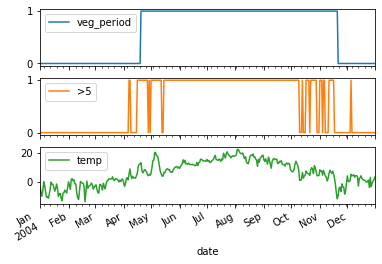

In [121]:
meteo[["veg_period",">5","temp"]].loc["2004"].astype(float).plot(subplots=True)